In [7]:
from video_data import ExamplesListing, ExamplesSet, DataSet

examples_listing = ExamplesListing.from_path("dataset", [".avi"], pickle_path="PathLabelListing.pkl")
examples_set = examples_listing.to_examples_set()
train_set, val_set, test_set = examples_set.split([0.7,0.2,0.1])
train_set = train_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
val_set = val_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
test_set = test_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
generator = train_set.get_batch_generator(2)

In [8]:
example = next(generator)
# example = generator
# train_set.width
print(example[0].shape)
print(example[0][0].shape)


(2, 50, 224, 224, 3)
(50, 224, 224, 3)


(224, 224, 3)


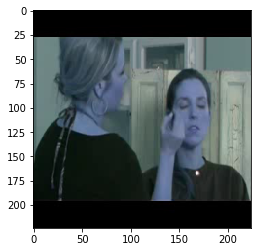

In [9]:
import numpy as np
from matplotlib import pyplot as plt
print(example[0][0][0].shape)
# a = np.reshape(example[0][0][0], (224, 224))
# print(a.shape)
plt.imshow(example[0][0][0])

In [10]:
frame_count = 50
batch_size = 10
class_count = 2
from i3d_inception import Inception_Inflated3d
import tensorflow as tf
print(train_set.get_shape())
model = Inception_Inflated3d(classes=class_count, input_shape=(train_set.get_shape()))

model.summary()

Using TensorFlow backend.


(50, 224, 224, 3)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 224, 224, 0                                            
__________________________________________________________________________________________________
Conv3d_1a_7x7_conv (Conv3D)     (None, 25, 112, 112, 65856       input_1[0][0]                    
__________________________________________________________________________________________________
Conv3d_1a_7x7_bn (BatchNormaliz (None, 25, 112, 112, 192         Conv3d_1a_7x7_conv[0][0]         
__________________________________________________________________________________________________
Conv3d_1a_7x7 (Activation)      (None, 25, 112, 112, 0           Conv3d_1a_7x7_bn[0][0]           
__________________________________________________________________________________________________
MaxPool2d_